# Homework 4 Solution

## Task 1

(In the following set $\alpha = 0.05$, $M=500$)

1. Comparing Bootstrap and Permutation Testing
    * Generate two arrays of 50 (each) random samples from a normal distribution, each with mean $\mu_1=\mu_2=50$, but with different stdevs: $\sigma_1 = 1, \sigma_2 = 4$.
    * Based on those two samples, test the Null Hypothesis $H_0: \mu_1=\mu_2$, $H_A: \mu_1 \neq \mu_2$ in two ways: (i) Bootstrap and (ii) Permutation.
    * Repeat the previous two steps (in a loop) $500$ times and save the test decisions in an array. 
    * Compute the type-I error rates for the two test procedures. Discuss your findings.
2. Random Walks
    * Adjust the code from the lesson such that you are simulating a **biased** random walk that imitates Web clicks: With probability $p=0.1$ you take a positive step $x=1$ (yes click), and with $p=0.9$ you stay where you are $x=0$ (no click). "Launch" $1000$ walkers for $400$ time steps each.
    * Write a function that (for each walker) tests the Null Hypothesis $H_0: p \leq 0.05$, $H_A: p > 0.05$ by applying this rule
    $$t = \frac{\sqrt{n} \cdot (\hat{p}- 0.05)}{\sqrt{0.05 \cdot 0.95}} > z_{1- \alpha} $$ where $\hat{p} = \sum x/n$ is the observed proportion of "ones" up to time step $n$.
    * Compute the type-II error rates for time steps $50$, $100$ and $400$.
    * Wouldn't it be nice to deploy an "early stopping" rule ? Try out the following strategy: stop the test **at any time** if your test statistic exceeds the threshold $z_{1- \alpha}$!
        * Compute your type-I error at the end of the $400$ time steps and compare to the one you set ($\alpha$).




In [1]:
# running our functions
%run ../ourFunctions.py

## Task 1.1 
* **Comparing Bootstrap and Permutation Testing**

In [2]:
def Bootstrap2Normals(mu1=0,mu2=0,s1=1,s2=4,n=50,M=500,alpha=0.05):
    x1= stats.norm.rvs(mu1,s1,n)
    x2= stats.norm.rvs(mu2,s2,n)
    
    meanNull = np.mean(np.concatenate([x1,x2]))
    empirical_diff_means = np.abs(np.mean(x1)-np.mean(x2))
    
    x1_shifted = x1 - np.mean(x1) + meanNull
    x2_shifted = x2 - np.mean(x2) + meanNull

    bs_replicates_1 = draw_bs_reps(x1_shifted, np.mean, M)
    bs_replicates_2 = draw_bs_reps(x2_shifted, np.mean, M)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_1 - bs_replicates_2
    
    pVal = np.mean( np.abs(bs_replicates) >= empirical_diff_means)
    
    return pVal < alpha


def Permutation2Normals(mu1=0,mu2=0,s1=1,s2=4,n=50,M=500,alpha=0.05):
    x1= stats.norm.rvs(mu1,s1,n)
    x2= stats.norm.rvs(mu2,s2,n)
    
    meanNull = np.mean(np.concatenate([x1,x2]))
    empirical_diff_means = np.abs(np.mean(x1)-np.mean(x2))

    # Get replicates of difference of means: bs_replicates
    perm_replicates = draw_perm_reps(x1, x2, diff_of_means, M)
    
    pVal = np.mean( np.abs(perm_replicates) >= empirical_diff_means)
    
    return pVal < alpha

* Generate two arrays of 50 (each) random samples from a normal distribution, each with mean $\mu_1=\mu_2=50$, but with different stdevs: $\sigma_1 = 1, \sigma_2 = 4$.

In [3]:
mu1=0;mu2=0;s1=1;s2=4;n=50;M=1000;alpha=0.05
x1= stats.norm.rvs(mu1,s1,n)
x2= stats.norm.rvs(mu2,s2,n)

meanNull = np.mean(np.concatenate([x1,x2]))
meanNull
empirical_diff_means = np.abs(np.mean(x1)-np.mean(x2))
empirical_diff_means

0.0918436265327637

* Repeat the previous two steps (in a loop) $500$ times and save the test decisions in an array. 

In [4]:
N = 500
TypeI = np.empty([N,2])
for i in range(N):
    TypeI[i,0] = Bootstrap2Normals()
    TypeI[i,1] = Permutation2Normals()

* Compute the type-I error rates for the two test procedures. Discuss your findings.

In [5]:
np.mean(TypeI,0)

array([0.048, 0.068])

In [6]:
TypeI_df = pd.DataFrame(TypeI)
TypeI_df

,0,1
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


## Task 1.2
* **Random Walks**

* Adjust the code from the lesson such that you are simulating a **biased** random walk that imitates Web clicks: With probability $p=0.1$ you take a positive step $x=1$ (yes click), and with $p=0.9$ you stay where you are $x=0$ (no click). "Launch" $1000$ walkers for $400$ time steps each.

In [7]:
def BiasedWalk(p0=0.1, nwalks = 5000, nsteps = 400): 
    draws = np.random.uniform(0, 1, size=(nwalks, nsteps)) # 0 or 1
    steps = np.where(draws > p0, 0, 1)
    walks = steps.cumsum(1)
    return walks

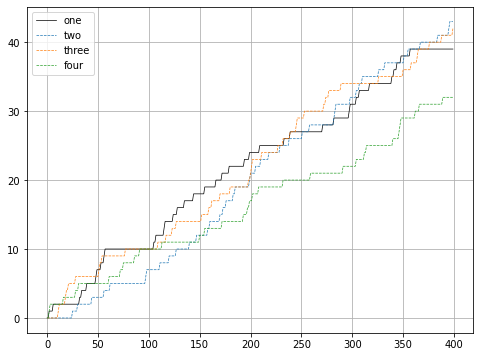

In [8]:
nwalks = 1000
nsteps = 400
walks = BiasedWalk(nwalks=nwalks, nsteps=nsteps)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(walks[1,:], 'k', label='one', linewidth=0.7)
ax.plot(walks[2,:], label='two', linestyle ='--', linewidth=0.7)
ax.plot(walks[3,:],  label='three', linestyle ='--', linewidth=0.7)
ax.plot(walks[4,:],  label='four', linestyle ='--', linewidth=0.7)
ax.grid()

ax.legend(loc='best')

* Write a function that (for each walker) tests the Null Hypothesis $H_0: p \leq 0.05$, $H_A: p > 0.05$ by applying this rule <br> <br>
    $$t = \frac{\sqrt{n} \cdot (\hat{p}- 0.05)}{\sqrt{0.05 \cdot 0.95}} > z_{1- \alpha} $$ <br> where $\hat{p} = \sum x/n$ is the observed proportion of "ones" up to time step $n$.

In [9]:
def TypeIIranWalk(walks, p0=0.05, timestep=50, alpha = 0.05):
    nwalks = walks.shape[0]
    TypeII = np.empty(nwalks)
    zCrit = stats.norm.ppf(1-alpha) # = 1.65
    for i in range(nwalks):
        pHat = walks[i,timestep-1]/timestep
        t = np.sqrt(timestep)*(pHat-p0)/np.sqrt(p0*(1-p0))
        TypeII[i] = (t <= zCrit ) #no reject
    #at this poinnt TypeII is a vector of lenght 5000

    return np.mean(TypeII)

* Compute the type-II error rates for time steps $50$, $100$ and $400$.

In [10]:
print(f'Type-II error 50 time stpes: {TypeIIranWalk(walks, timestep=50)}')
print(f'Type-II error 100 time stpes: {TypeIIranWalk(walks, timestep=100)}')
print(f'Type-II error 400 time stpes: {TypeIIranWalk(walks, timestep=400)}')

Type-II error 50 time stpes: 0.618
Type-II error 100 time stpes: 0.31
Type-II error 400 time stpes: 0.023


* Wouldn't it be nice to deploy an "early stopping" rule ? Try out the following strategy: stop the test **at any time** if your test statistic exceeds the threshold $z_{1- \alpha}$!

In [11]:
def TypeIranWalk_sequential(walks, p0=0.05, alpha = 0.05):
    nwalks = walks.shape[0]
    nsteps = walks.shape[1]
    steps = (np.arange(nsteps)+1)
    
    TypeI = np.empty(nwalks)
    zCrit = stats.norm.ppf(1-alpha)
    
    for i in range(nwalks):
        pHat = walks[i,:]/steps
        t = np.sqrt(steps)*(pHat-p0)/np.sqrt(p0*(1-p0))
        TypeI[i] = np.any((t > zCrit )) # reject
    return np.mean(TypeI)

* Compute your type-I error at the end of the $400$ time steps and compare to the one you set ($\alpha$).

In [12]:
walks0 = BiasedWalk(p0=0.05)
TypeIranWalk_sequential(walks0)

0.4292

In [13]:
#debugging:
i=1;p0=0.05
nwalks = walks.shape[0]
nsteps = walks.shape[1]
steps = (np.arange(nsteps)+1)
zCrit = stats.norm.ppf(1-alpha)
pHat = walks[i,:]/steps
t = np.sqrt(steps)*(pHat-p0)/np.sqrt(p0*(1-p0))

In [14]:
np.any((t > 2 ))

True

In [15]:
zCrit

1.6448536269514722